# Lecture 3 

### 02/09/2021

### Kurt Semm 

### CLW Spring 2021 - Python & Finance

## What have we done so far? 

### Lecture 1 - Introduction to Python
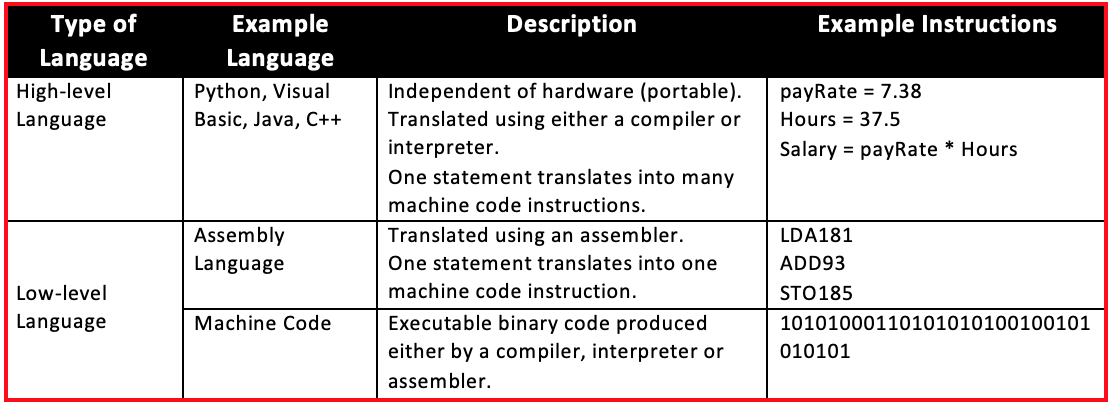



[Reference](https://bournetocode.com/projects/GCSE_Computing_Fundamentals/pages/3-2-9-class_prog_langs.html)

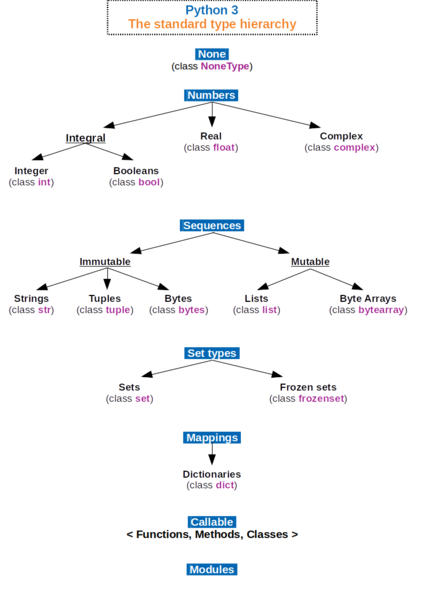

### Lecture 2 - Import and Clean Data

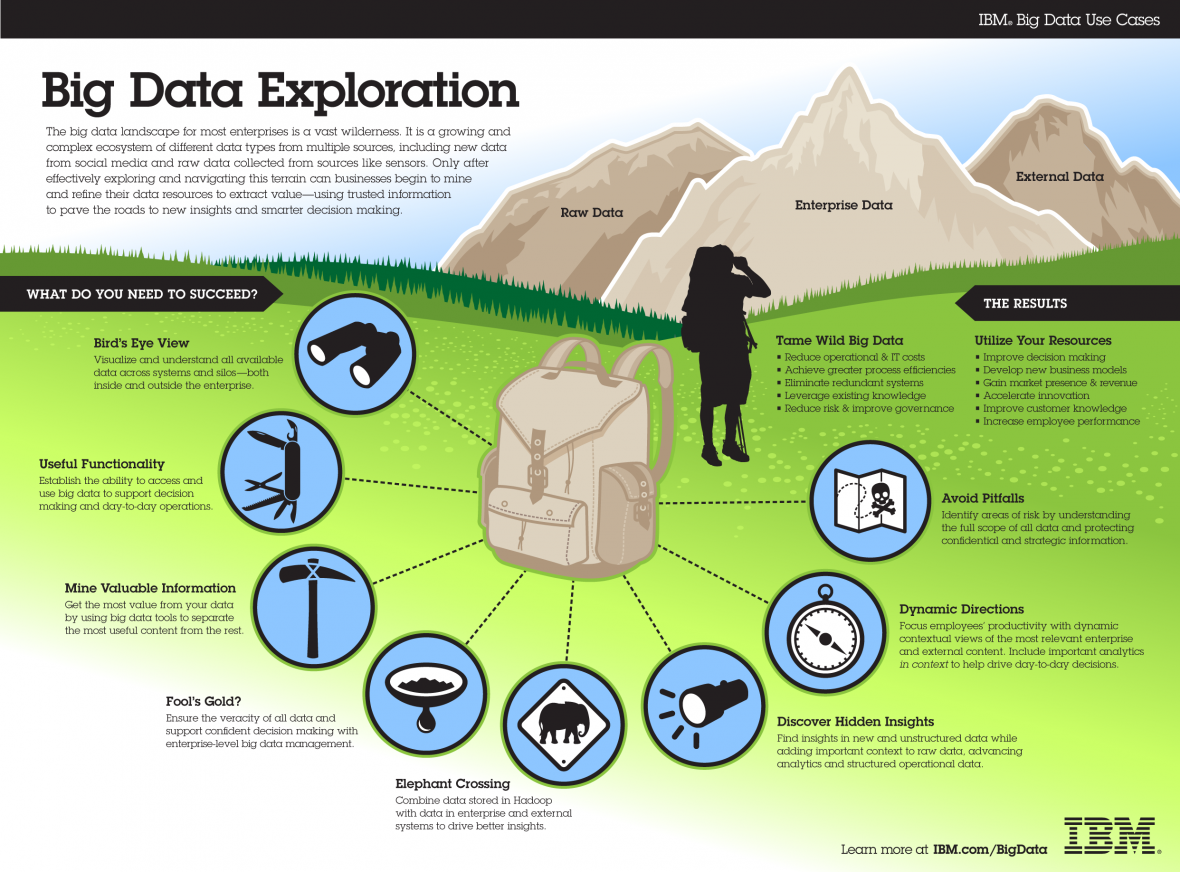

* Using pip install 
* Getting financial data
* Find and set working directory
* Get the Data 
* Import the data using Pandas
* Dataframe characteristics
* Subset the Dataframe
* Conditional Subsetting
* Data Cleaning

## Feeling Overwhelmed? Good, you should be!

* Some helpful [advice](https://www.thinkful.com/blog/why-learning-to-code-is-so-damn-hard/)
* 1. The Hand Holding Honeymoon
* 2. The Cliff of Confusion
* 3. The Desert of Despair OR what I call the Launch Your Computer Against the Wall
* 4. The Upswing of Awesome 

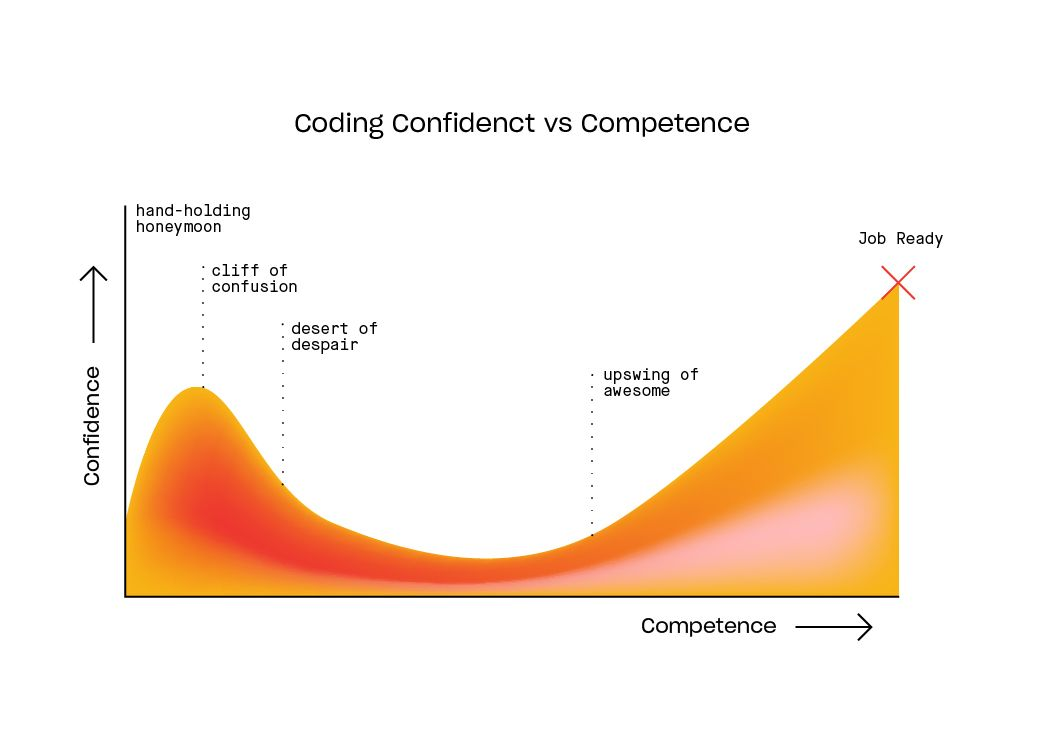

## Plotting with Python 

* [Matplotlib](https://matplotlib.org/)
* [Seaborn](https://seaborn.pydata.org/)

## Regressions
* Why you should plot your regressions
    * Issues with Linear approximation
    * Anscombe's 1973 Paper 
        * [When Models Lie: Why Plotting Your Data Is Super-Duper Critical](https://www.hranalytics101.com/when-models-lie-why-plotting-your-data-is-super-duper-critical/)


* Economists and Regressions
    * <blockquote class="twitter-tweet"><p lang="en" dir="ltr">When you ask an economist to model something. <a href="https://t.co/O3a6CJXeoG">pic.twitter.com/O3a6CJXeoG</a></p>&mdash; Edmund Helmer (@theotheredmund) <a href="https://twitter.com/theotheredmund/status/1349453230762196992?ref_src=twsrc%5Etfw">January 13, 2021</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
    
    
## Distributions 
* Normal or Gaussian Distributions. 
* For more complex distributions, Gumbel or exponential, please explore the [Scipy Package](https://docs.scipy.org/doc/scipy/reference/stats.html). 
* Get comfortable looking at distributions alongside your Regressions and scatterplot.

In [1]:
#Installing packages we will use.
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf

/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
import os
os.getcwd()

'/Users/kurtsemm/Documents/Python & Finance/Lecture 3'

In [3]:
#os.chdir('/Users/kurtsemm/Downloads')
os.chdir('/Users/kurtsemm/Documents/Python & Finance/Lecture 3')

#Documents/Python & Finance/Lecture 3

In [4]:
# First we have to import the os library to specify to python our computer directory. 
import os
 
# The path for listing items
path = '.'
 
# The list of items
files = os.listdir(path)
 
# Loop to print each filename separately
for filename in files:
    print(filename)

Housing.xlsx
Lecture 3 code_along.docx
Anscombe_1973.pdf
.ipynb_checkpoints
Lecture 3.ipynb
IQ_data.xlsx
~$cture 3 code_along.docx
stock_dr.jpeg


## Basic plot with matplotlib.

In [5]:
df = yf.download('jnj', start="2019-01-01", end="2021-02-9", period='1d')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,128.130005,128.380005,126.279999,127.750000,120.959183,7631700
2019-01-03,128.139999,128.270004,125.360001,125.720001,119.037086,8654500
2019-01-04,127.120003,128.649994,126.730003,127.830002,121.034927,8831700
2019-01-07,127.629997,128.350006,126.800003,127.010002,120.258514,8404700
2019-01-08,128.179993,130.500000,127.730003,129.960007,123.051704,9351600


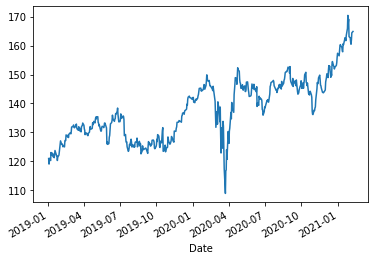

In [6]:
df['Adj Close'].plot()

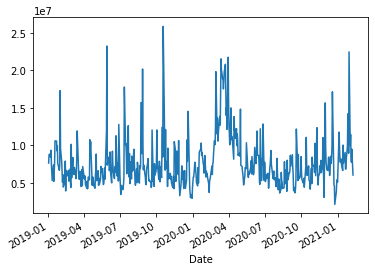

In [7]:
df['Volume'].plot()

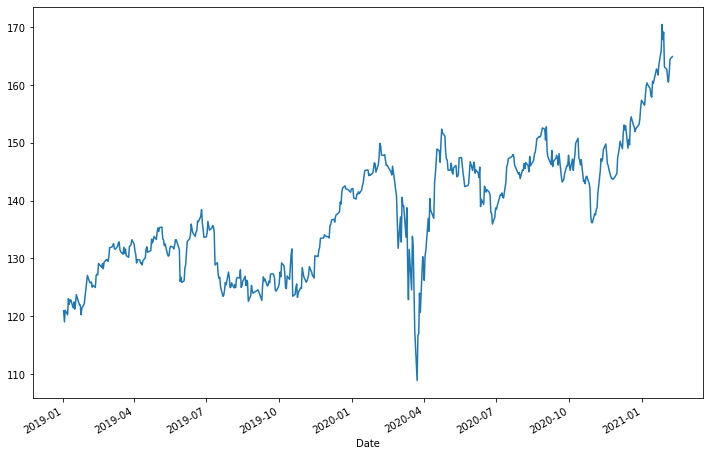

In [8]:
df['Adj Close'].plot(figsize=(12,8))

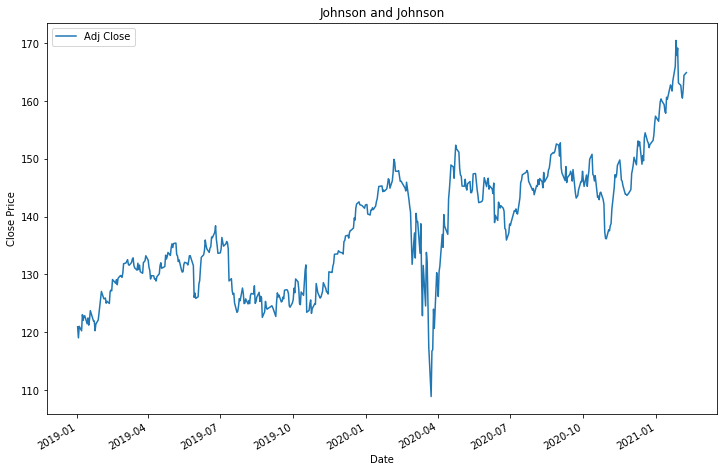

In [9]:
df['Adj Close'].plot(figsize=(12,8))
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.title('Johnson and Johnson')
plt.legend()

## Seaborn 
* Dont be afraid to use [Templates](https://seaborn.pydata.org/examples/anscombes_quartet.html). 
* Different than Plagiarism 
* Courses I used to learn Python:
    * [intro](https://www.udemy.com/course/python-for-finance-investment-fundamentals-data-analytics/)
    * [advanced](https://www.udemy.com/course/python-for-finance-and-trading-algorithms/)

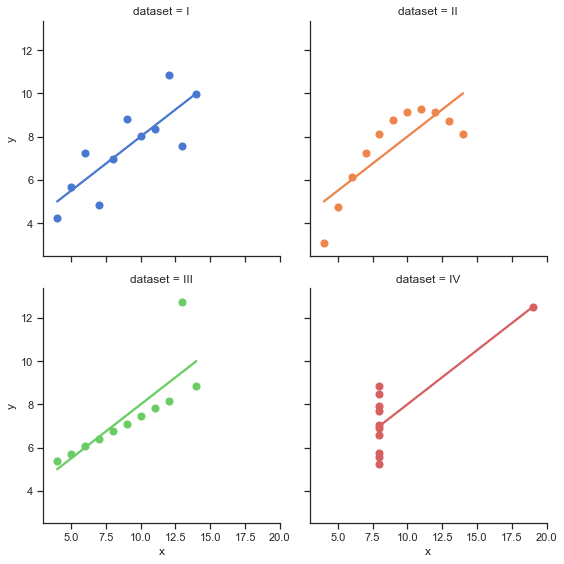

In [10]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

## Regressions
* [Quantecon](https://quantecon.org/)
* [Basic Regressions](https://github.com/QuantEcon/lecture-python.notebooks)
* [Advanced Regressions](https://github.com/QuantEcon/quantecon-notebooks-python)

### Let's try a simple Regression
* We are going to look at what determines a House's Price. 
* First let us import statsmodel.api and stats from scipy

In [11]:
from scipy import stats
import statsmodels.api as sm 

In [12]:
#Loading the Data
df2 = pd.read_excel('Housing.xlsx')
df2.head(10)

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995
5,1010000,1850,IN,7,1998
6,600000,1000,IN,4,2015
7,700000,1100,LA,4,2014
8,1100000,1600,LA,7,2017
9,570000,1000,NY,5,1997


In [14]:
#Clara's question from class, "How do I change the column name from House Size (sq.ft.) to House Size?"
df2 = df2.rename(columns={'House Size (sq.ft.)':'House Size'})
df2.head(10)

,House Price,House Size,State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995
5,1010000,1850,IN,7,1998
6,600000,1000,IN,4,2015
7,700000,1100,LA,4,2014
8,1100000,1600,LA,7,2017
9,570000,1000,NY,5,1997


In [15]:
#Determine our variables
#Make sure you change House Size (sq.ft.) to House Size below. 
X = df2[['House Size', 'Number of Rooms', 'Year of Construction']]
Y = df2['House Price']

In [16]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

reg1 = reg.summary()
reg1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     14.90
Date:                Tue, 09 Feb 2021   Prob (F-statistic):           6.82e-05
Time:                        18:20:28   Log-Likelihood:                -258.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      16   BIC:                             528.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -9.452e+06    5.4e+06     -1.752      0.099   -2.09e+07    1.99e+06
House Size             341.8271    179.666      1.903      0.075     -39.049     722.703
Number of Rooms        1.16e+04   3.74e+04      0.310      0.760   -6.77e+04    9.08e+04
Year of Construction  4863.5761   2697.969      1.803      0.090    -855.862    1.06e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.747
Skew:                          -0.676   Prob(JB):                        0.418
Kurtosis:                       2.484   Cond. No.                     5.40e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Well maybe House Price is mostly determined by (sq. ft.)

In [36]:
#No log and then with log
#np.log (from the numpy package) lets us log the whole column, or determine the growth rate. 
x = np.log((df2[['House Size (sq.ft.)']]))
y = ((df2[['House Price']]))

In [37]:
x1 = sm.add_constant(x)
reg = sm.OLS(y, x).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            House Price   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                              484.4
Date:                Tue, 09 Feb 2021   Prob (F-statistic):                    5.55e-15
Time:                        17:14:09   Log-Likelihood:                         -268.96
No. Observations:                  20   AIC:                                      539.9
Df Residuals:                      19   BIC:                                      540.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
House Size (sq.ft.)  1.168e+05   5307.148     22.009      0.000    1.06e+05    1.28e+05
==============================================================================
Omnibus:                        1.966   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.374   Jarque-Bera (JB):                1.492
Skew:                           0.492   Prob(JB):                        0.474
Kurtosis:                       2.093   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
df3 = pd.read_excel('IQ_data.xlsx')
df3.head(10)

,IQ,Test 1,Test 2,Test 3,Test 4,Test 5
0,107,84,35,66,64,65
1,93,74,20,74,49,83
2,103,55,82,83,66,74
3,122,97,73,92,89,95
4,103,85,54,73,69,83
5,106,87,73,64,78,58
6,98,77,63,65,70,65
7,93,55,50,44,53,85
8,95,38,44,93,40,73
9,13,43,55,97,49,84


In [40]:
x = df3['Test 1']
y = df3['IQ']

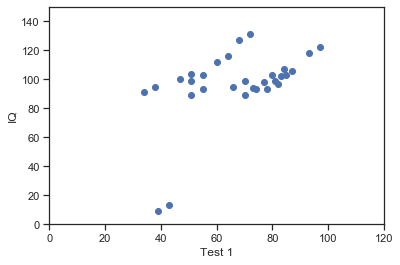

In [41]:
plt.scatter(x,y)
plt.axis([0, 120, 0, 150])
plt.ylabel('IQ')
plt.xlabel('Test 1')
plt.show()

In [42]:
x1 = sm.add_constant(x)
reg = sm.OLS(y, x).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     IQ   R-squared (uncentered):                   0.940
Model:                            OLS   Adj. R-squared (uncentered):              0.938
Method:                 Least Squares   F-statistic:                              454.3
Date:                Tue, 09 Feb 2021   Prob (F-statistic):                    2.90e-19
Time:                        17:16:26   Log-Likelihood:                         -138.50
No. Observations:                  30   AIC:                                      279.0
Df Residuals:                      29   BIC:                                      280.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Test 1         1.4030      0.066     21.315      0.000       1.268       1.538
==============================================================================
Omnibus:                        1.429   Durbin-Watson:                   2.521
Prob(Omnibus):                  0.490   Jarque-Bera (JB):                0.967
Skew:                          -0.027   Prob(JB):                        0.617
Kurtosis:                       2.122   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## (  **ARGS, **KWARGS)

In Python, we can pass a variable number of arguments to a function using special symbols:

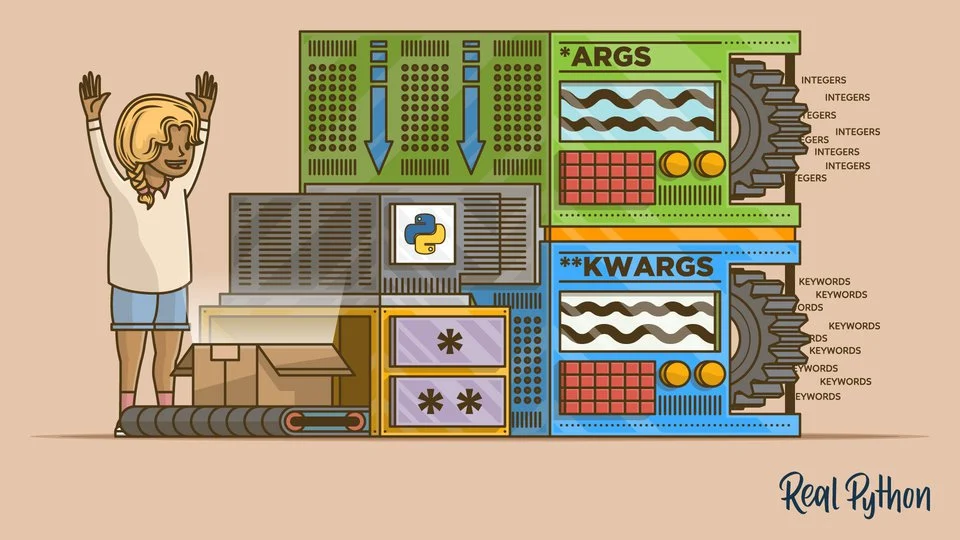

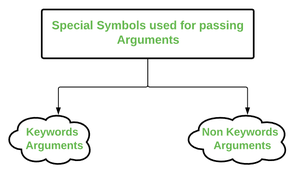

## Distributions 

In [44]:
df = yf.download('aapl', start="2019-01-01", end="2021-02-9", period='1d')
df.head(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.505024,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.669640,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,36.149662,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,36.069202,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.756794,164101200
2019-01-09,37.822498,38.632500,37.407501,38.327499,37.380985,180396400
2019-01-10,38.125000,38.492500,37.715000,38.450001,37.500465,143122800
2019-01-11,38.220001,38.424999,37.877499,38.072498,37.132290,108092800
2019-01-14,37.712502,37.817501,37.305000,37.500000,36.573921,129756800


In [46]:
df_daily = df.pct_change()
df_daily.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.070437,-0.082657,-0.079297,-0.099607,-0.099607,1.465252
2019-01-04,0.003820,0.019421,0.012676,0.042689,0.042689,-0.358168
2019-01-07,0.028852,0.001885,0.014604,-0.002226,-0.002226,-0.065338
2019-01-08,0.005783,0.020090,0.017958,0.019063,0.019063,-0.251060
2019-01-09,0.011567,0.017850,0.007474,0.016982,0.016982,0.099300
2019-01-10,0.007998,-0.003624,0.008220,0.003196,0.003196,-0.206621
2019-01-11,0.002492,-0.001754,0.004309,-0.009818,-0.009818,-0.244755
2019-01-14,-0.013278,-0.015810,-0.015114,-0.015037,-0.015037,0.200420


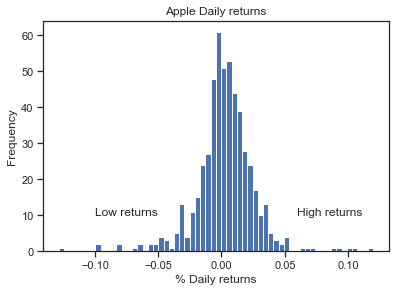

In [54]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
df_daily["Adj Close"].plot.hist(bins = 60)
ax1.set_xlabel("% Daily returns")
ax1.set_ylabel("Frequency")
ax1.set_title("Apple Daily returns")
ax1.text(-0.1,10,"Low returns")
ax1.text(0.06,10,"High returns")
plt.savefig('stock_dr.jpeg')
plt.show()